# 📚 Project: Customer Segmentation using K-Means

## 1. Problem Statement
- Cluster customers into groups based on Age, Income, and Spending Score.

In [56]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


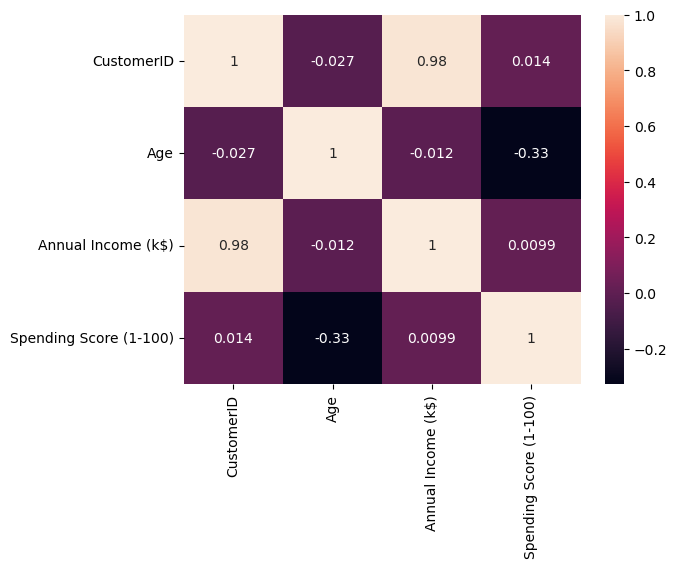

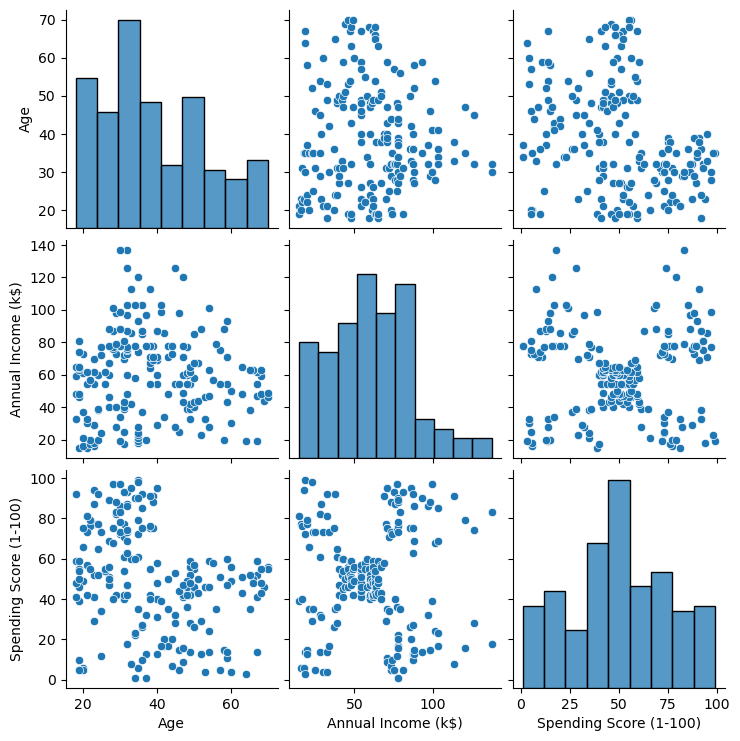

In [57]:
# Basic info
df.info()
df.describe()
# Only select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Check for missing values
df.isnull().sum()

# Visualize features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
#sns.heatmap(df.corr(), annot=True)#

In [58]:
  # Selecting useful features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

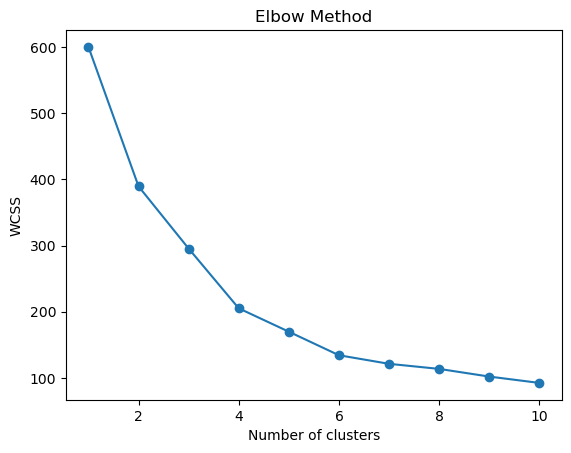

In [59]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [79]:
# Choose optimal clusters from Elbow curve, e.g., k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
df['Cluster'] = clusters

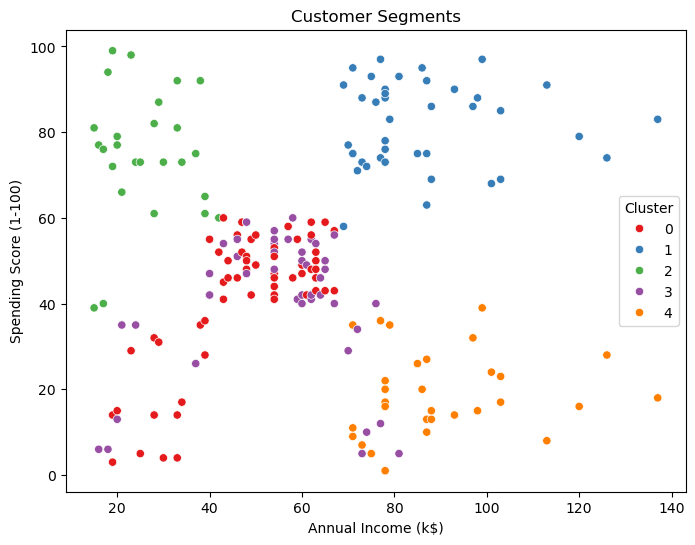

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

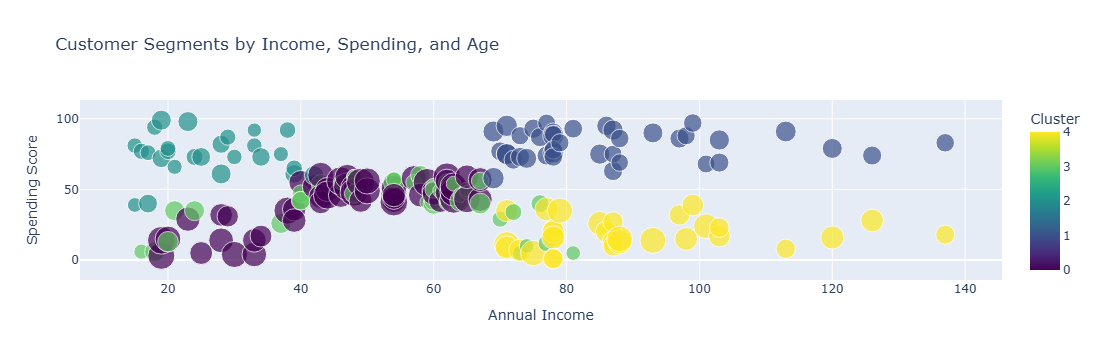

In [93]:
import plotly.express as px
import pandas as pd

# Load your data (replace with your actual clustered DataFrame)
df = pd.read_csv('Mall_Customers.csv')
df['Cluster'] = clusters  # Add the cluster labels you got from KMeans

# Rename columns if needed (Plotly likes clean names)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score', 'Cluster']

# Bubble Plot: Income vs Spending Score with Age as size
fig = px.scatter(
    df
    x='Annual Income',
    y='Spending Score',
    color='Cluster',
    size='Age',
    hover_data=['Gender'],
    title='Customer Segments by Income, Spending, and Age',
    color_continuous_scale='Viridis'
)
fig.show()


In [97]:
label_map = {
    0: 'Mature Average Spenders',
    1: 'High Value Customers',
    2: 'Young Impulsive Spenders',
    3: 'Standard Young Customers',
    4: 'Wealthy Conservative Customers'
}

df['Segment'] = df['Cluster'].map(label_map)

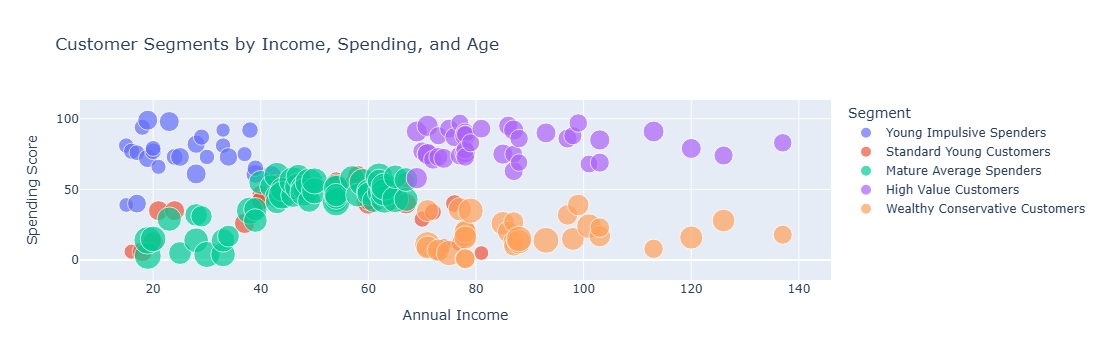

In [109]:
fig = px.scatter(
    df,
    x='Annual Income',
    y='Spending Score',
    color='Segment',
    size='Age',
    hover_data=['Gender'],
    title='Customer Segments by Income, Spending, and Age',
    color_continuous_scale='Viridis'
)
fig.show()

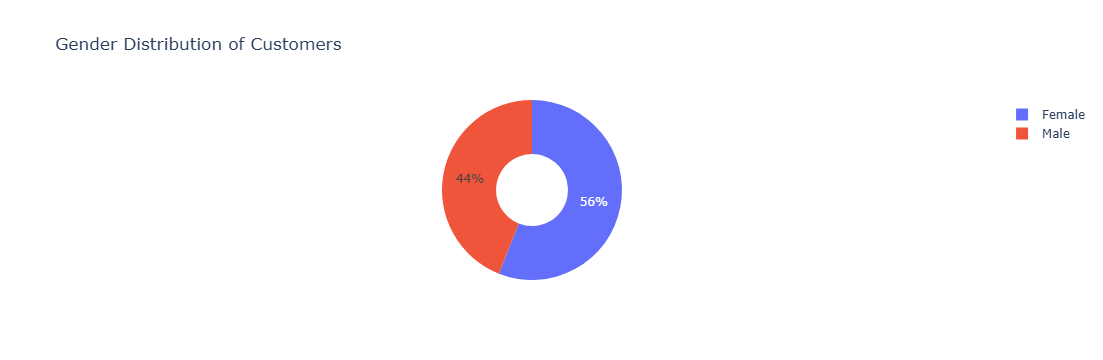

In [111]:
fig = px.pie(
    df,
    names='Gender',
    title='Gender Distribution of Customers',
    hole=0.4  # donut chart style
)
fig.show()

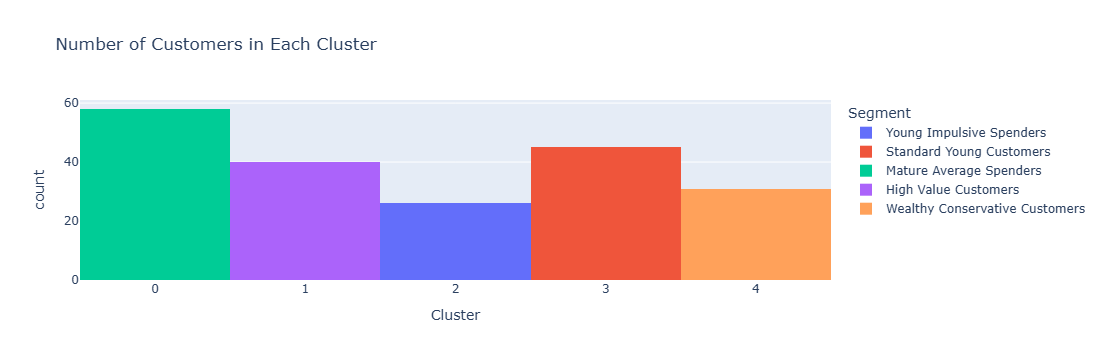

In [113]:
fig = px.histogram(
    df,
    x='Cluster',
    title='Number of Customers in Each Cluster',
    color='Segment'
)
fig.show()

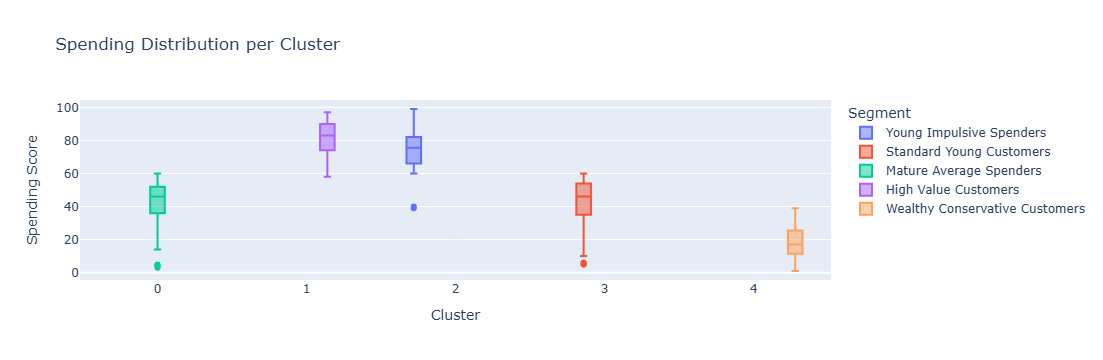

In [115]:
fig = px.box(
    df,
    x='Cluster',
    y='Spending Score',
    color='Segment',
    title='Spending Distribution per Cluster'
)
fig.show()

In [117]:
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income,Spending Score
Cluster,,,,
0,68.775862,55.275862,47.620690,41.706897
1,161.025000,32.875000,86.100000,81.525000
2,23.461538,25.769231,26.115385,74.846154
3,86.377778,26.733333,54.311111,40.911111
4,166.870968,44.387097,89.774194,18.483871
